In [1]:
#!pip install sweetviz
#!pip show numba
#!pip uninstall pandas-profiling
#!pip show pandas-profiling
#!pip install --upgrade pandas
#!pip install --upgrade visions
#!pip install pandas-profiling==3.1.0
#!pip install pandas==1.3.3



In [2]:
import pandas as pd  # Pandas for data manipulation
#import pandas_profiling
#import ydata_profiling
import sweetviz as sv

import matplotlib.pyplot as plt  # Matplotlib for data visualization
%matplotlib inline
import numpy as np  # NumPy for numerical operations
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
import seaborn as sns  # Seaborn for data visualization

# Import machine learning models
from sklearn.naive_bayes import GaussianNB, BernoulliNB  # For binary classification
from sklearn.naive_bayes import MultinomialNB  # For multi-class classification
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting classifier

# Import machine learning evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Import tools for data splitting
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("C:/Users/efiom/Desktop/Outils/Projets/Admiral Consulting/Optimisation des procedes industriels avec l'IA/database/predictive_maintenance_dataset.csv")

                                             |          | [  0%]   00:00 -> (? left)


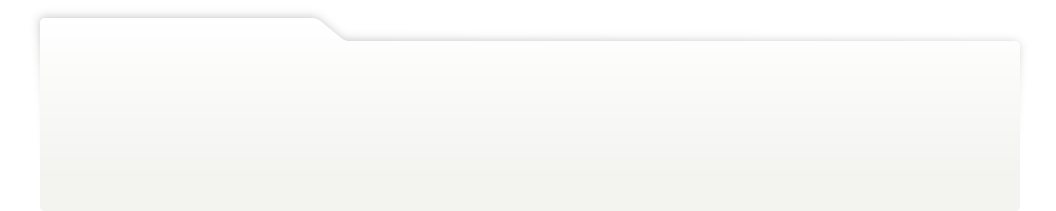
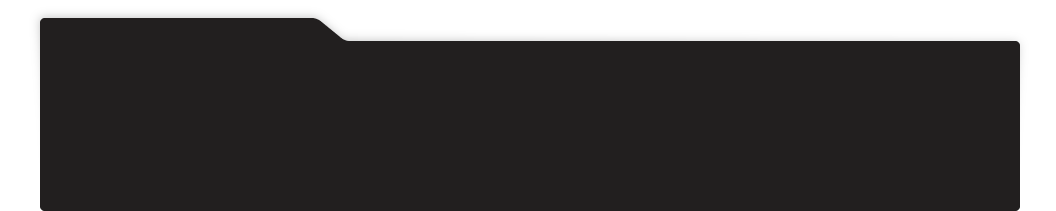
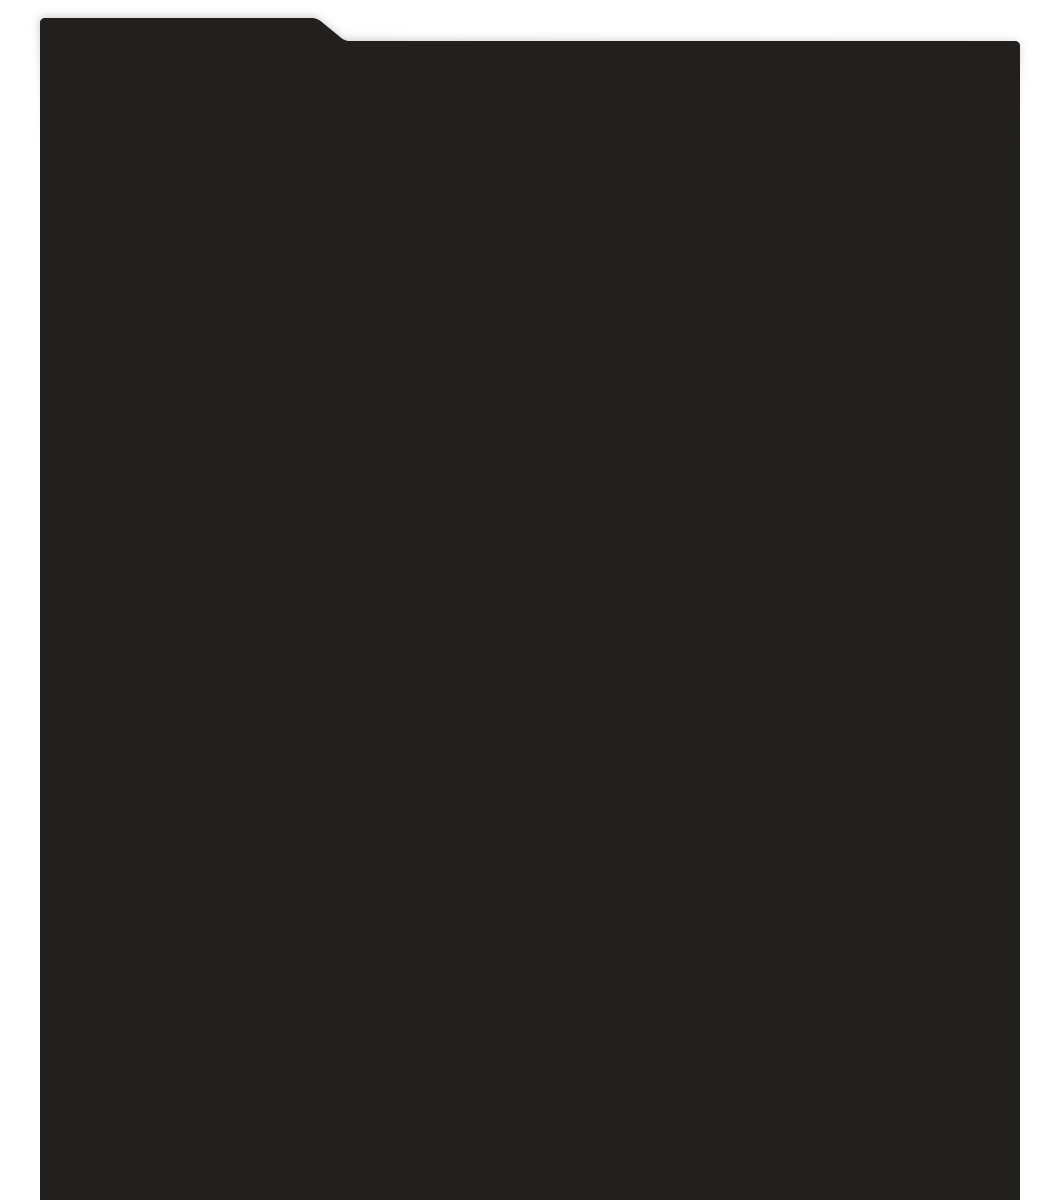
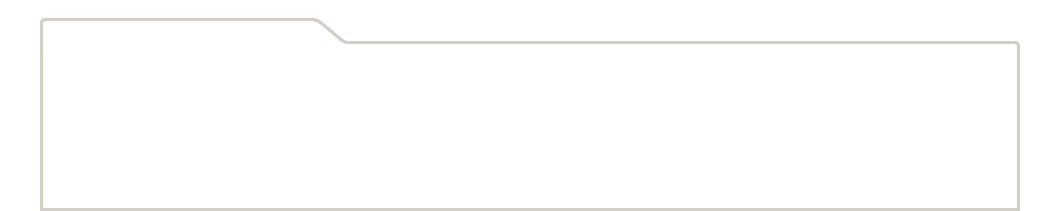
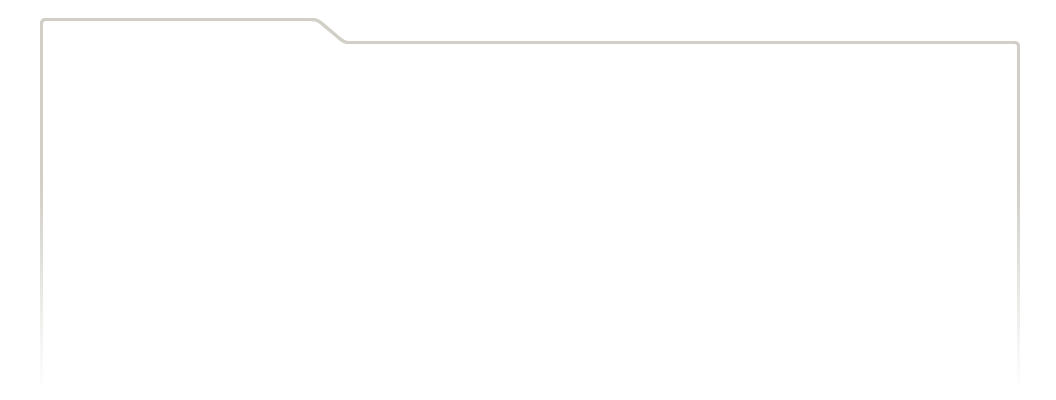
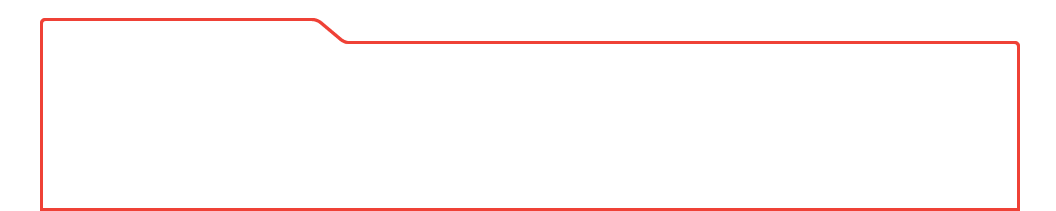
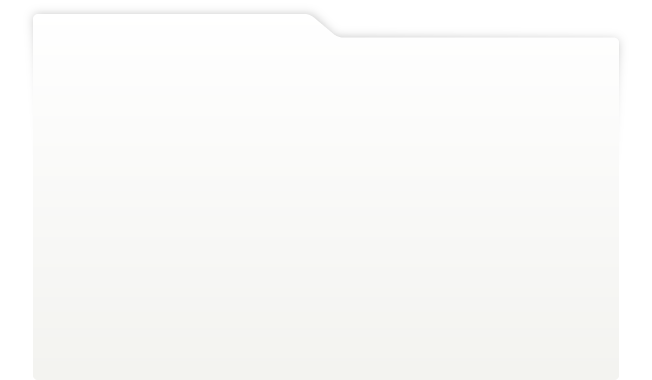
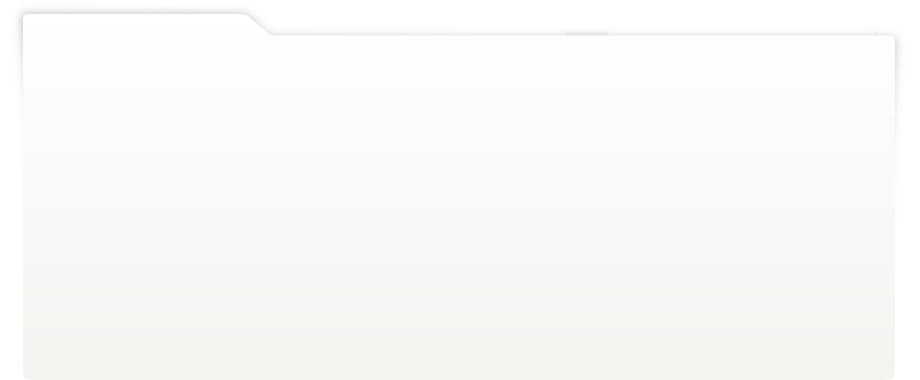
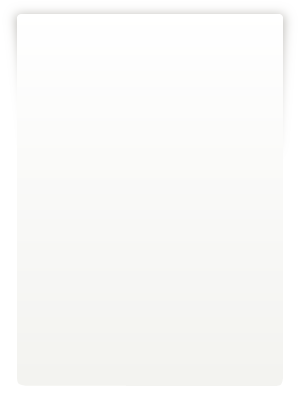
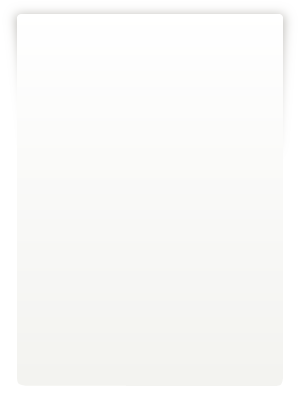
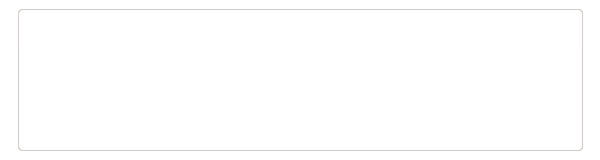
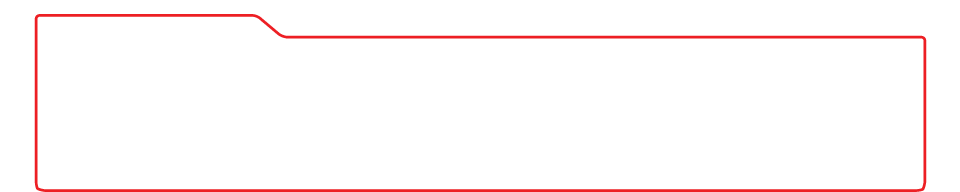
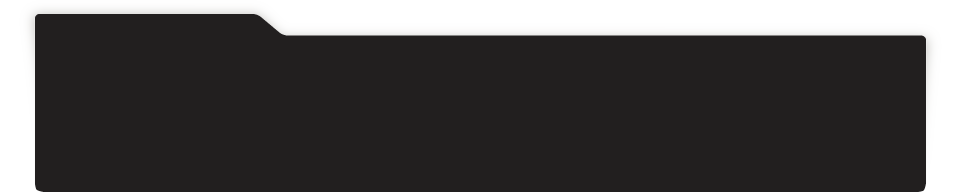
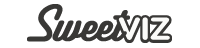
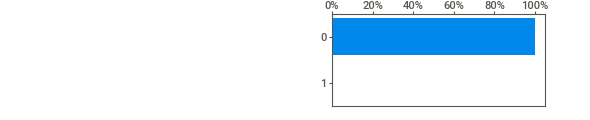
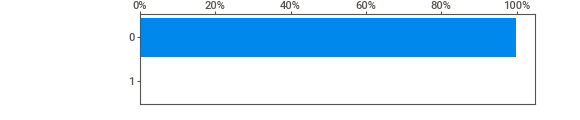
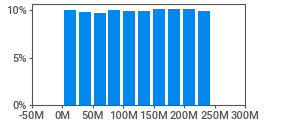
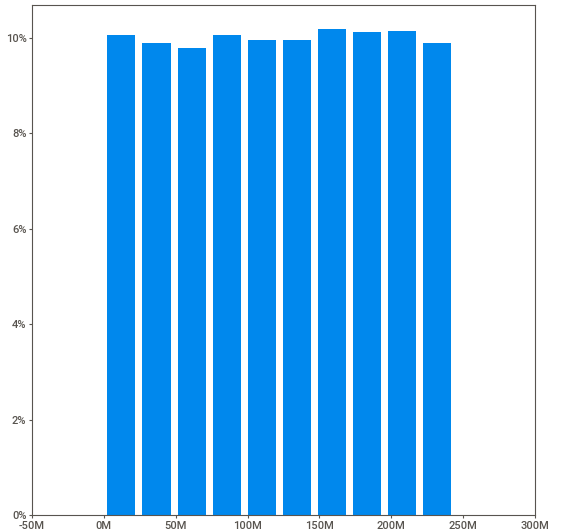
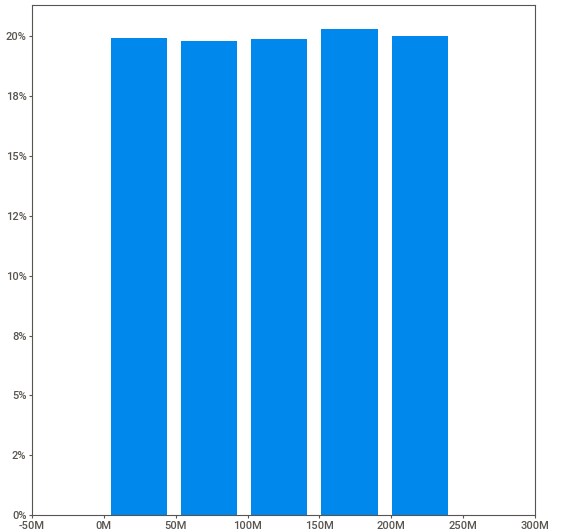
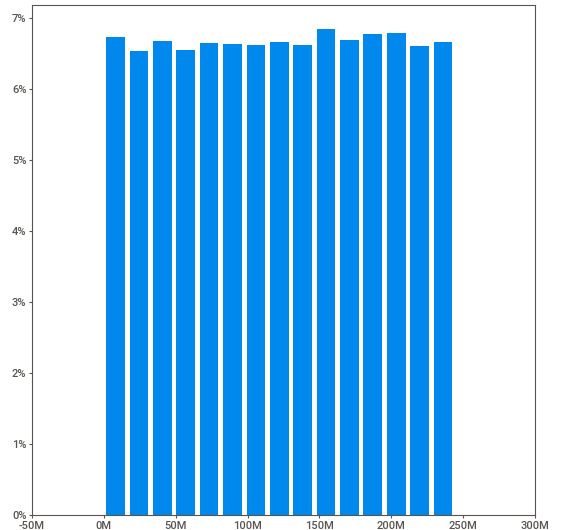
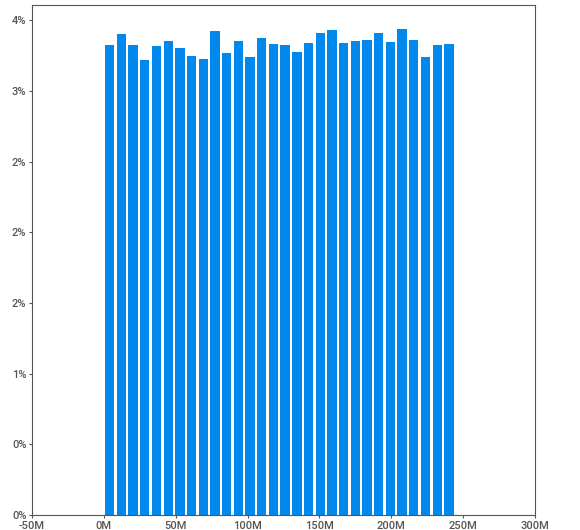
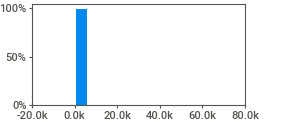
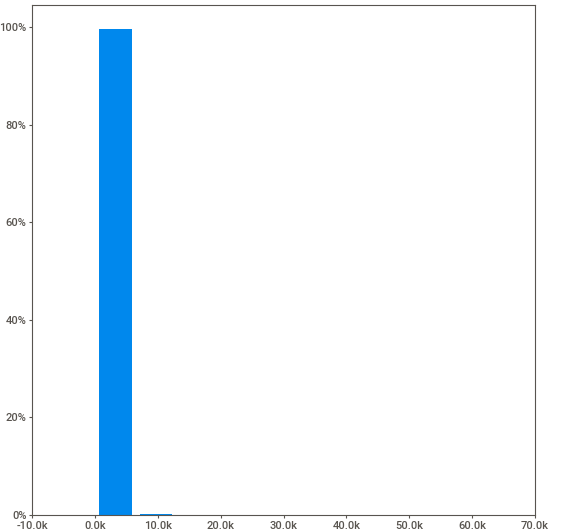
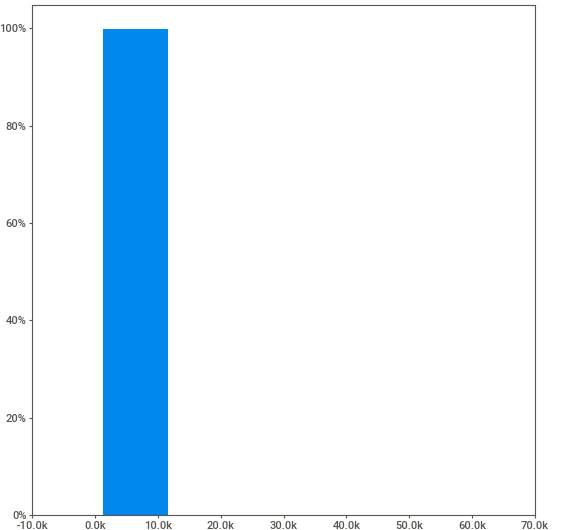
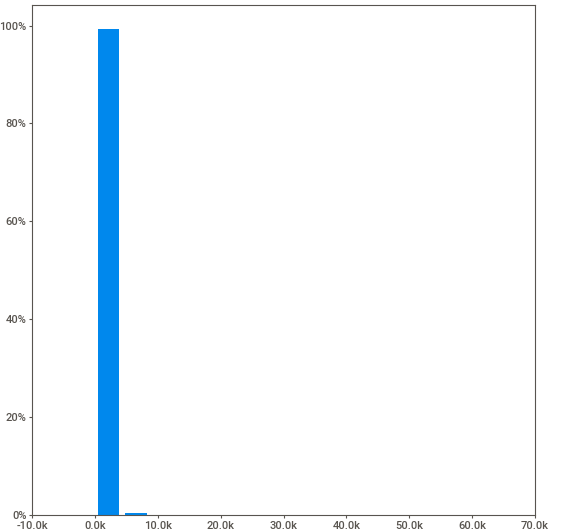
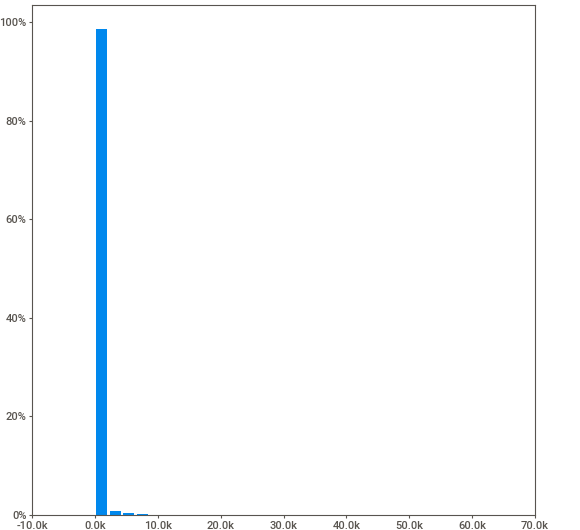
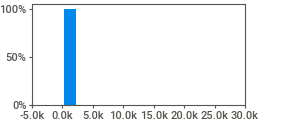
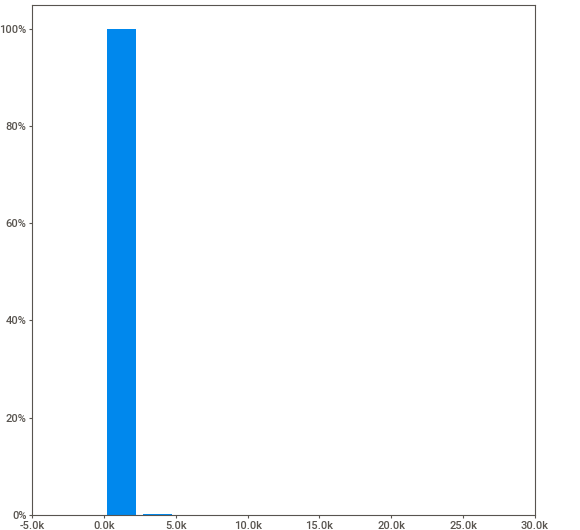
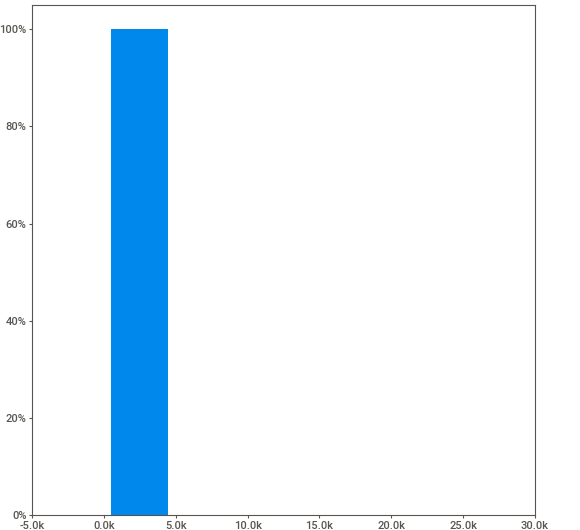
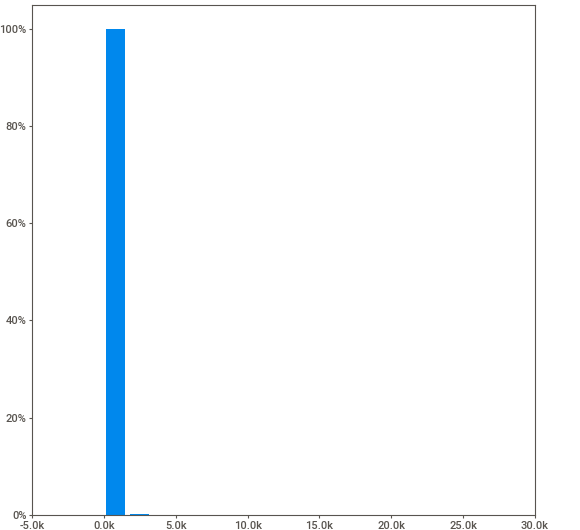
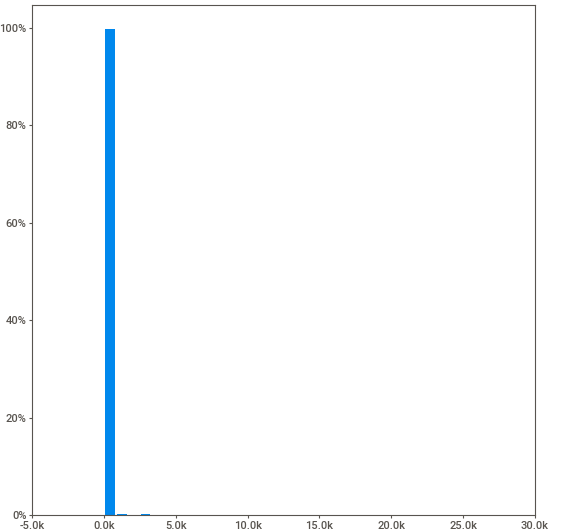
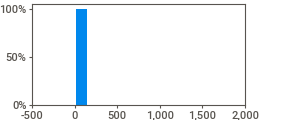
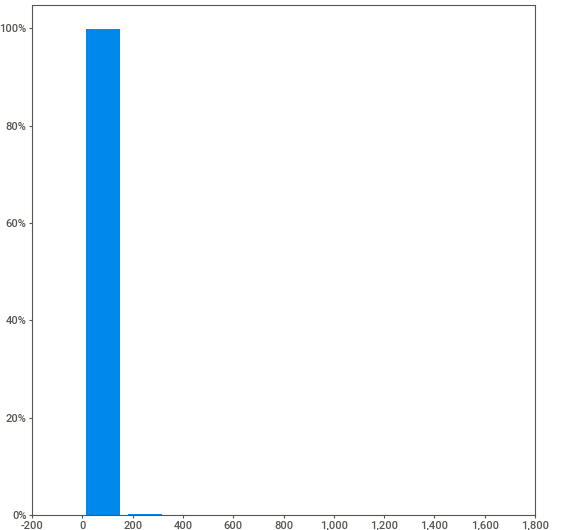
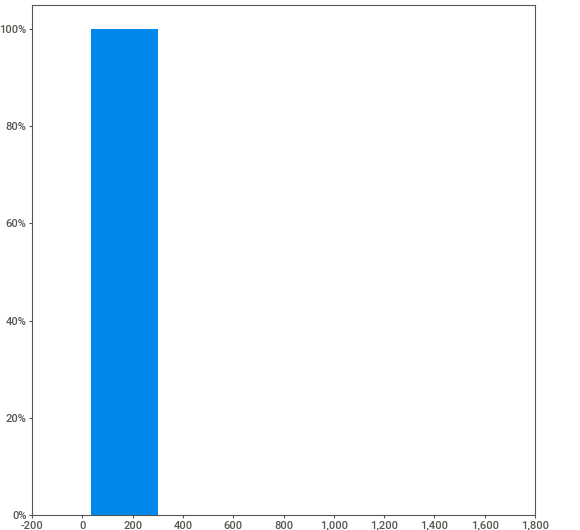
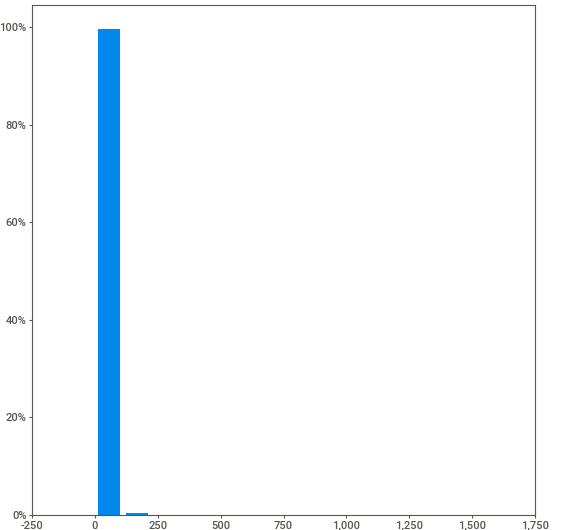
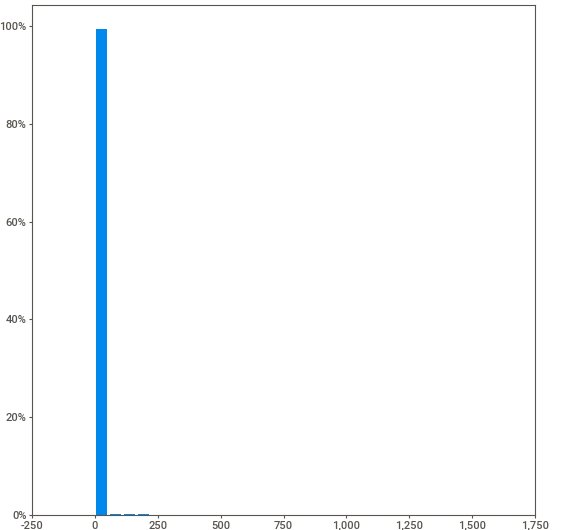
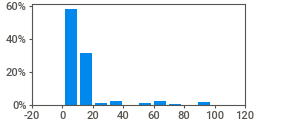
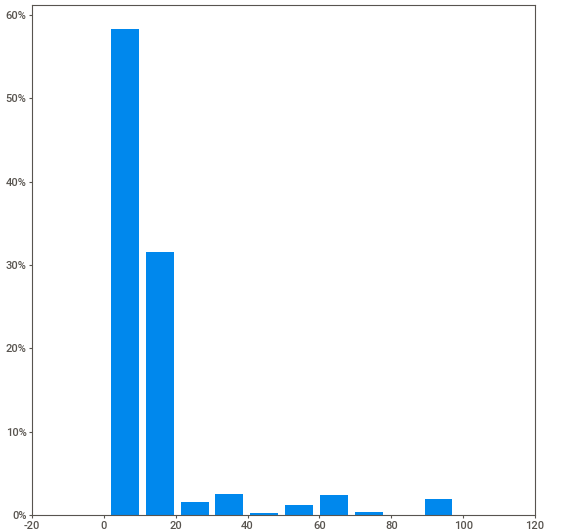
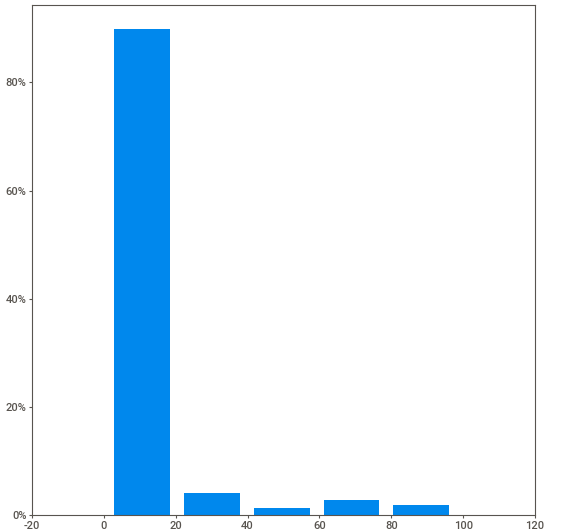
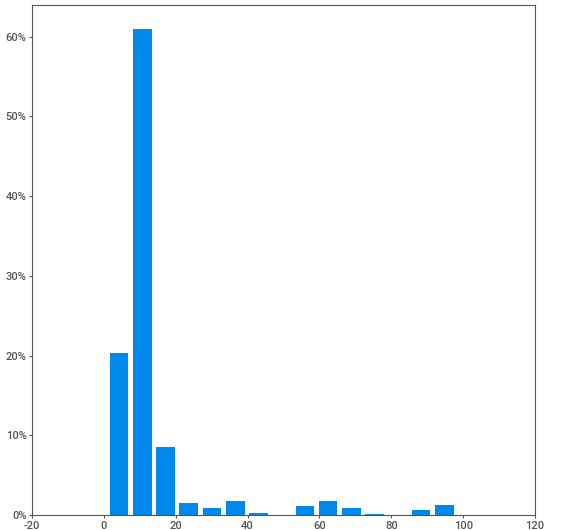
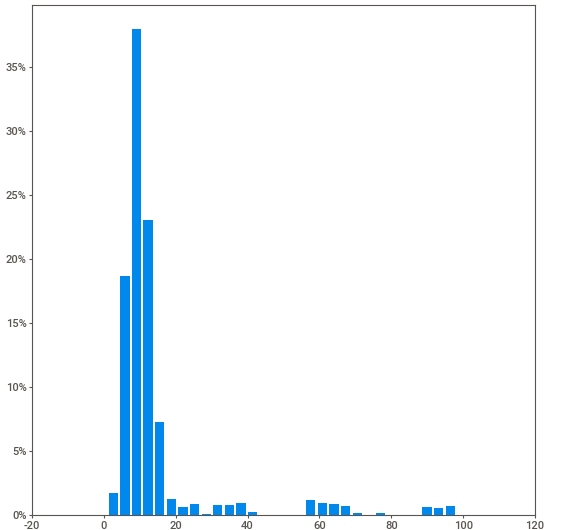
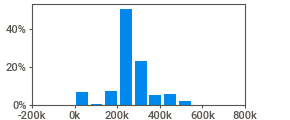
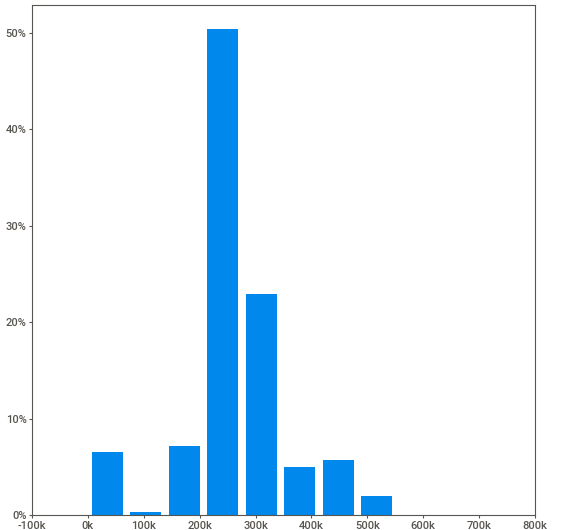
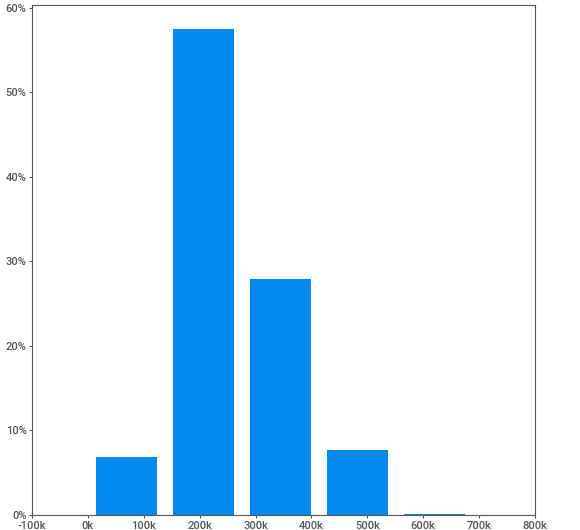
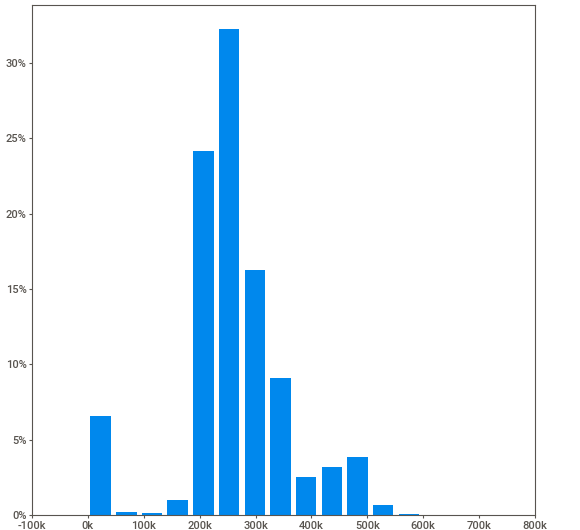
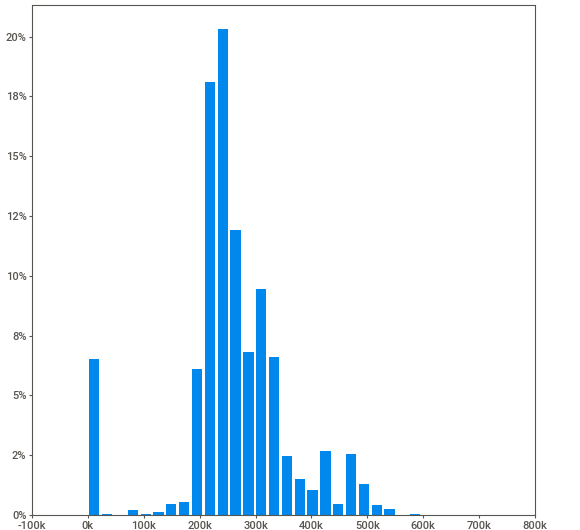
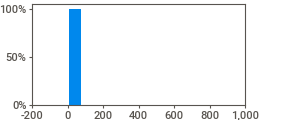
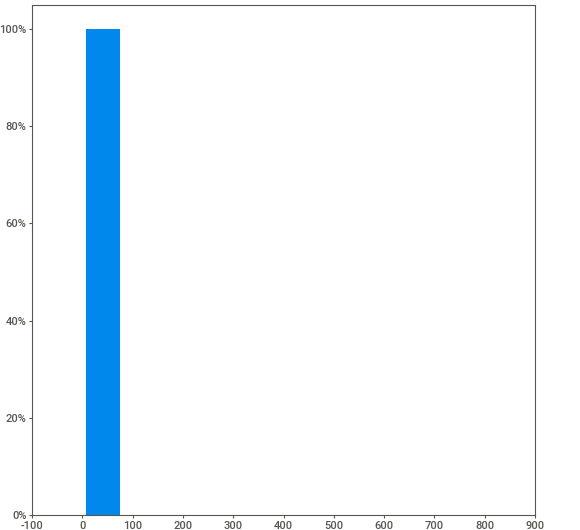
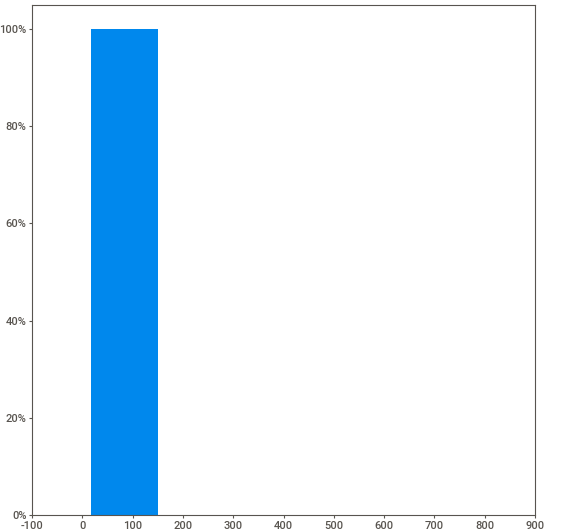
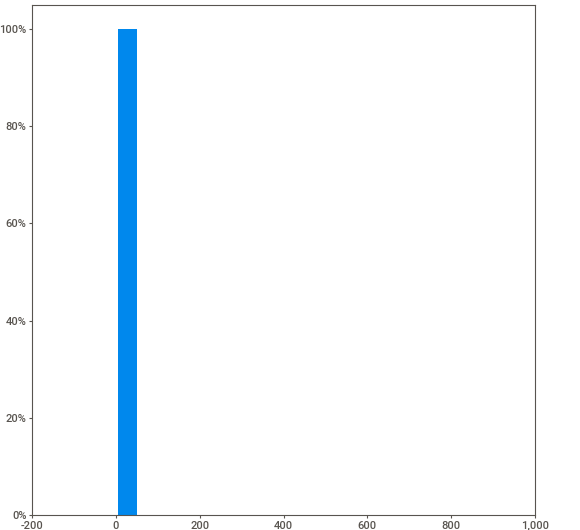
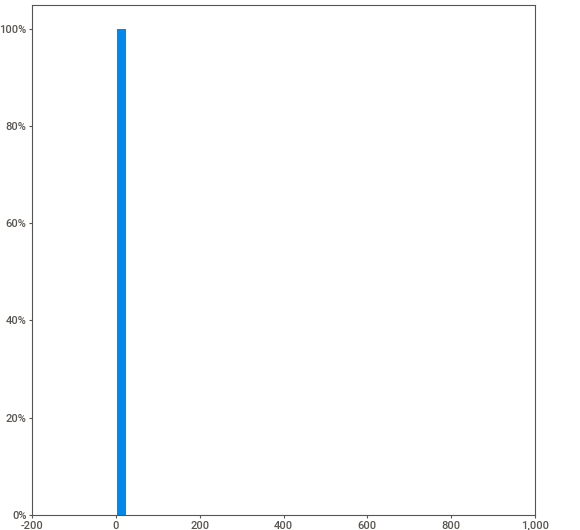
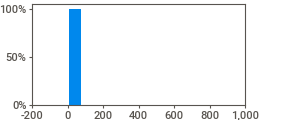
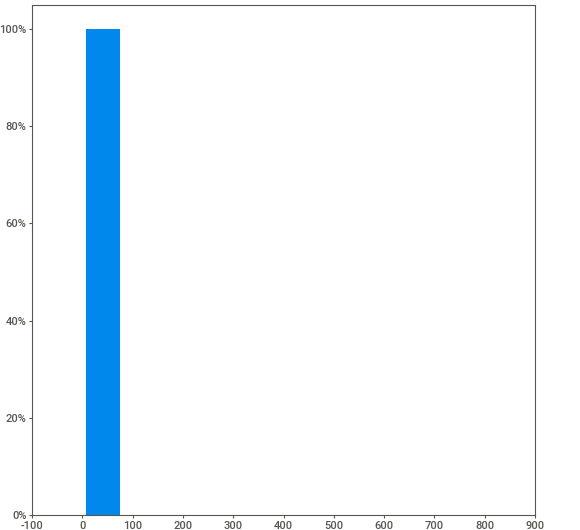
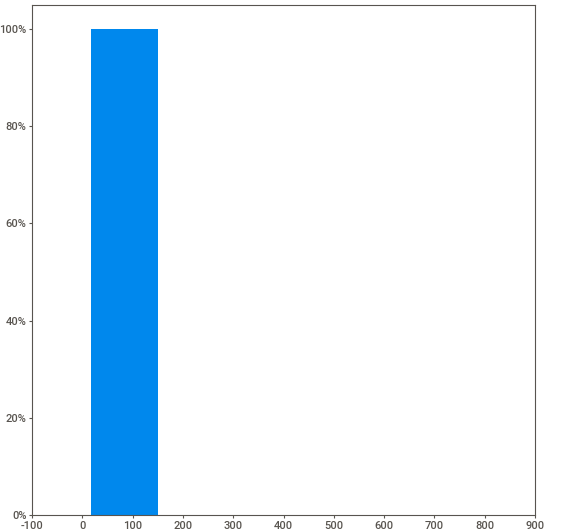
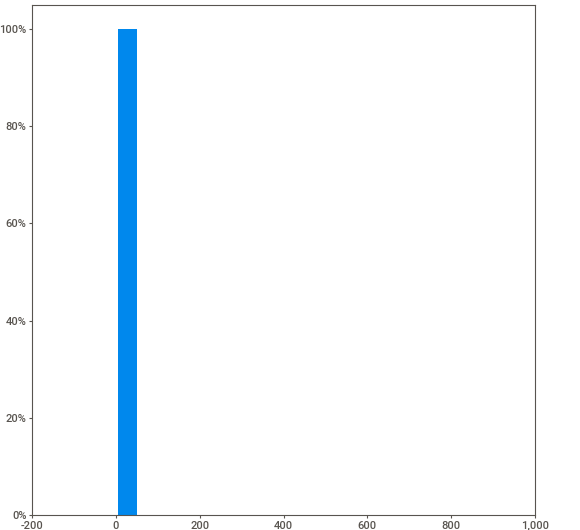
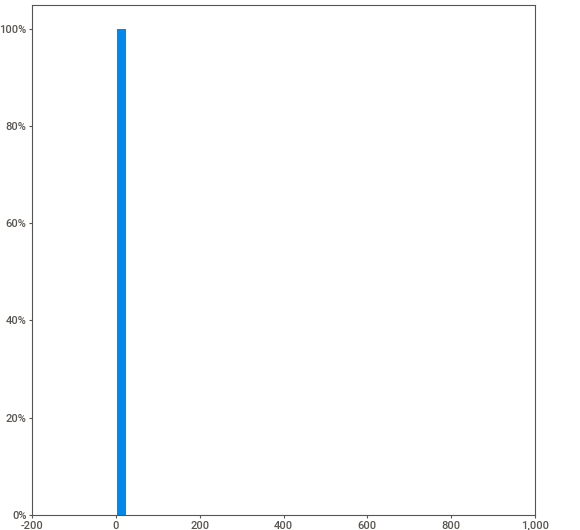
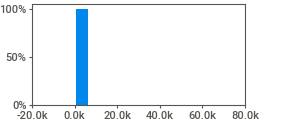
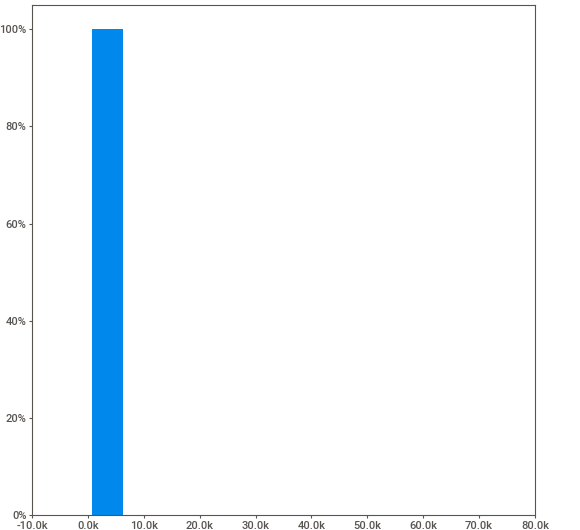
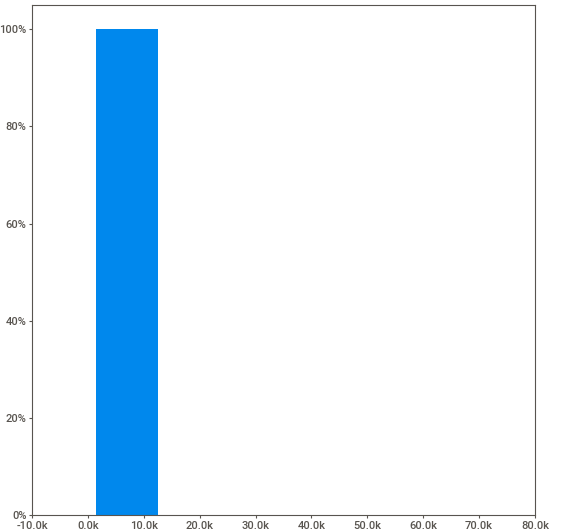
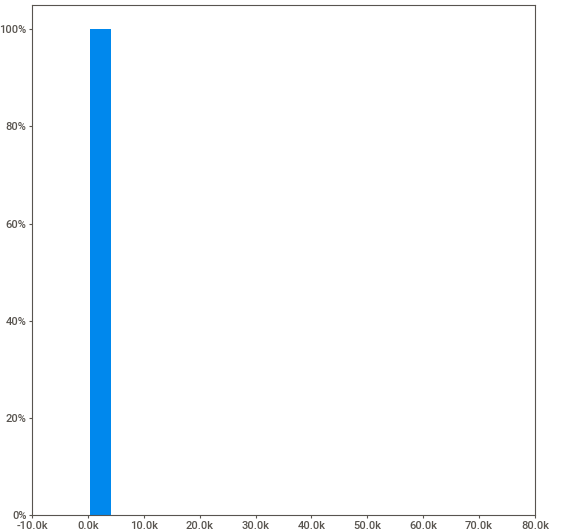
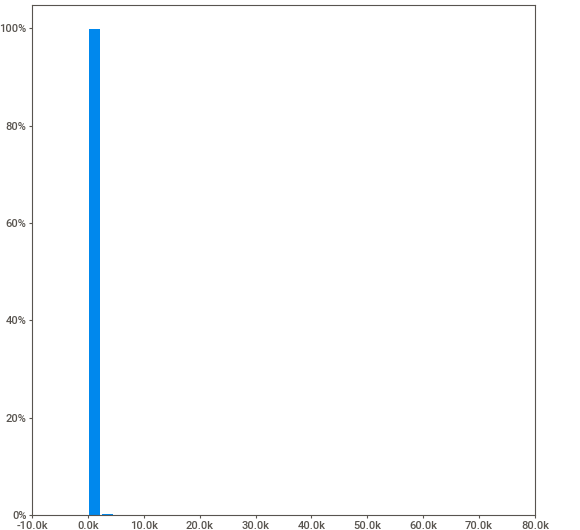
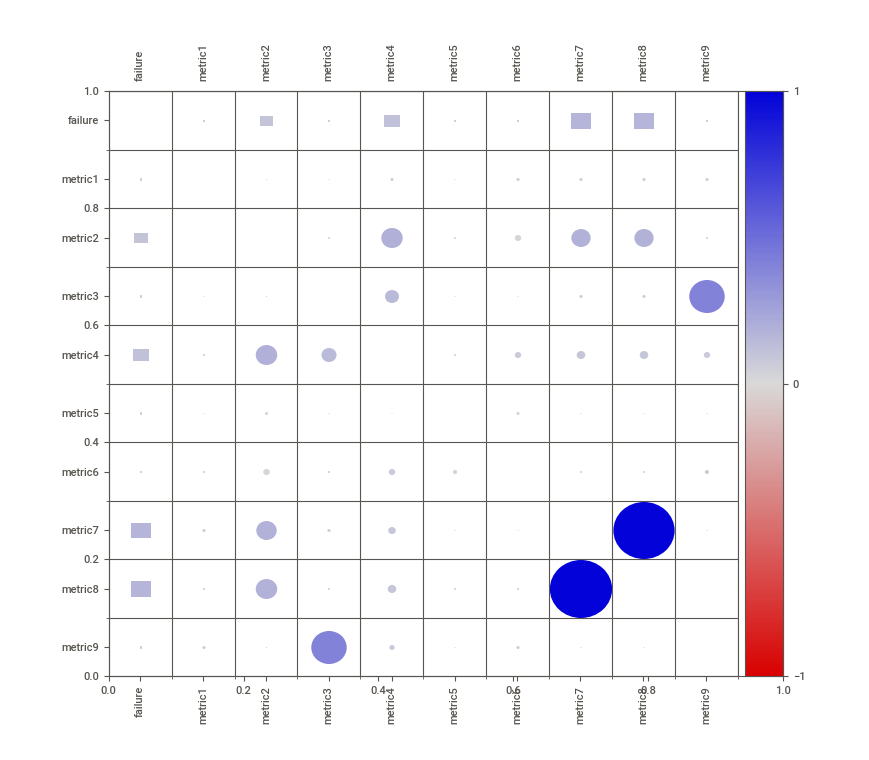
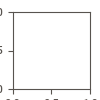

In [4]:
#EDA: en utilisant profiling panda 
#df.profile_report()

#en utilisant sweetviz 
report = sv.analyze(df)
#report.show_html('rapport_df.html')

# Afficher directement dans le notebook
report.show_notebook()

In [5]:
df.shape

(124494, 12)

In [6]:
#on voit que il y a des valeurs qui se dupliquent
df.drop_duplicates(inplace=True)
df.shape

(124493, 12)

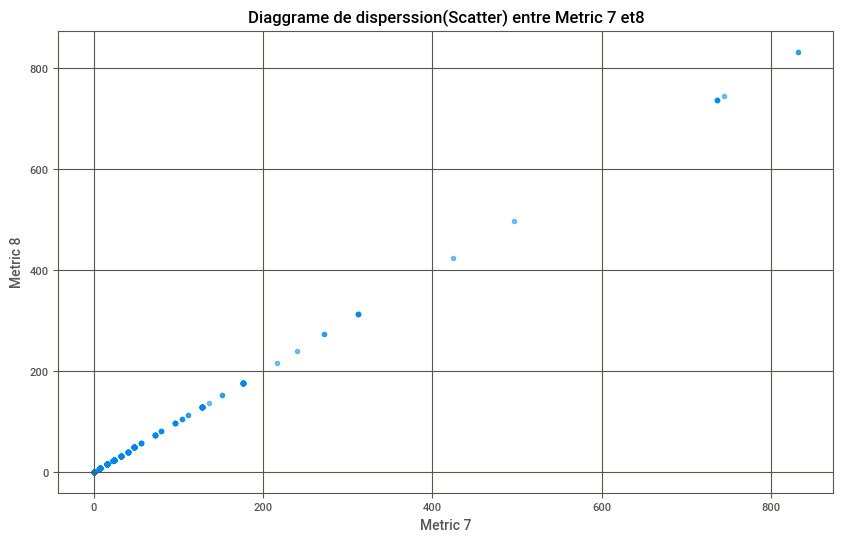

In [7]:
#Pour les données asymétriques, vous pouvez envisager d'appliquer des transformations telles que des transformations logarithmiques pour rendre la distribution plus symétrique.

plt.figure(figsize=(10, 6))
plt.scatter(df['metric7'], df['metric8'], alpha=0.5)
plt.title('Diaggrame de disperssion(Scatter) entre Metric 7 et8')
plt.xlabel('Metric 7')
plt.ylabel('Metric 8')
plt.grid(True)
plt.show()

In [8]:
#et donc pour avoir une dispersion symetric on va appliquer la transformation logrithme
for num in ["2", "3", "4", "7", "8"]:
    df[f'metric{num}']= np.log1p(df[f'metric{num}'])

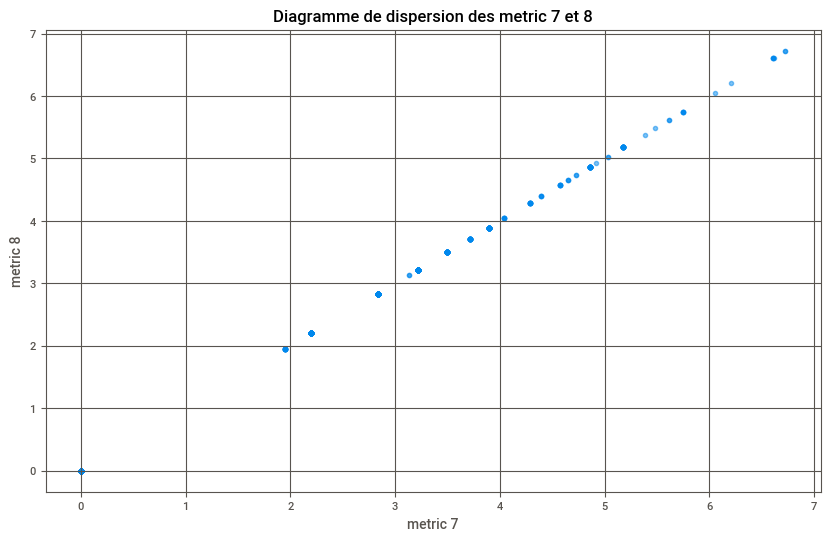

In [9]:
#on refais la dispersion voir
plt.figure(figsize=(10,6))
plt.scatter(df['metric7'], df['metric8'], alpha=0.5)#voir la dispersion entre 7 et 8
plt.title("Diagramme de dispersion des metric 7 et 8")
plt.xlabel('metric 7')
plt.ylabel('metric 8')
plt.grid(True)
plt.show()

In [10]:
#metric 7 and metric 8 is almost same values so I will drop metric 8.
df.drop("metric8", axis=1, inplace=True)

In [11]:
#definition de fontion pour la sommairisation
def summarize_data(df):
    print("Le nombre de colonnes et ligne:", df.shape)
    print("\nColonne dans dataset", df.columns)
    print("\nType de donnees et valeurs manquantes: ")
    print(df.info())
    print("\nSommaire statistique pour les colonnes numeriques:")
    print(df.describe())
    print("\nLes valeurs manquantes: ", df.isnull().sum())
    print("\nValeurs unique en colonne 'faillure' ")
    print(df['failure'].value_counts())

summarize_data(df)
    

Le nombre de colonnes et ligne: (124493, 11)

Colonne dans dataset Index(['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric9'],
      dtype='object')

Type de donnees et valeurs manquantes: 
<class 'pandas.core.frame.DataFrame'>
Index: 124493 entries, 0 to 124493
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     124493 non-null  object 
 1   device   124493 non-null  object 
 2   failure  124493 non-null  int64  
 3   metric1  124493 non-null  int64  
 4   metric2  124493 non-null  float64
 5   metric3  124493 non-null  float64
 6   metric4  124493 non-null  float64
 7   metric5  124493 non-null  int64  
 8   metric6  124493 non-null  int64  
 9   metric7  124493 non-null  float64
 10  metric9  124493 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 11.4+ MB
None

Sommaire statistique pour les colonnes numeriques:
     

In [12]:
#Nous n'avons pas de valeurs nulles, mais nous avons un très petit nombre d'échantillons positifs pour la variable cible, ce qui indique un problème de sous-échantillonnage.
df['device']

0         S1F01085
1         S1F0166B
2         S1F01E6Y
3         S1F01JE0
4         S1F01R2B
            ...   
124489    Z1F0MA1S
124490    Z1F0Q8RT
124491    Z1F0QK05
124492    Z1F0QL3N
124493    Z1F0QLC1
Name: device, Length: 124493, dtype: object

In [13]:
#Il semble qu'il existe un modèle avec les 4 premières lettres. je vais donc créer une nouvelle colonne avec ces valeurs.
df["device_model"]=df["device"].apply(lambda x:x[:4]) #affcicher les 4 premieres lettres des device
df["device_model"].value_counts()

device_model
S1F0    33168
W1F0    23294
S1F1    21689
W1F1    19974
Z1F0    18869
Z1F1     7248
Z1F2      251
Name: count, dtype: int64

In [14]:
#et on fait quoi du rest
df["device_rest"]=df["device"].apply(lambda x:x[4:])
df["device_rest"].value_counts()[:20]

device_rest
QLC1    304
KYCR    304
E9EP    304
EGMT    304
FGBQ    304
FP0C    304
GCED    304
GGPP    304
5X69    304
GPXY    304
H6JG    304
FEH7    304
MA1S    304
FY92    304
FZPA    304
G9T7    304
JH87    304
JXDL    304
JY02    304
GB8A    304
Name: count, dtype: int64

In [15]:
df.drop("device", axis=1, inplace=True)

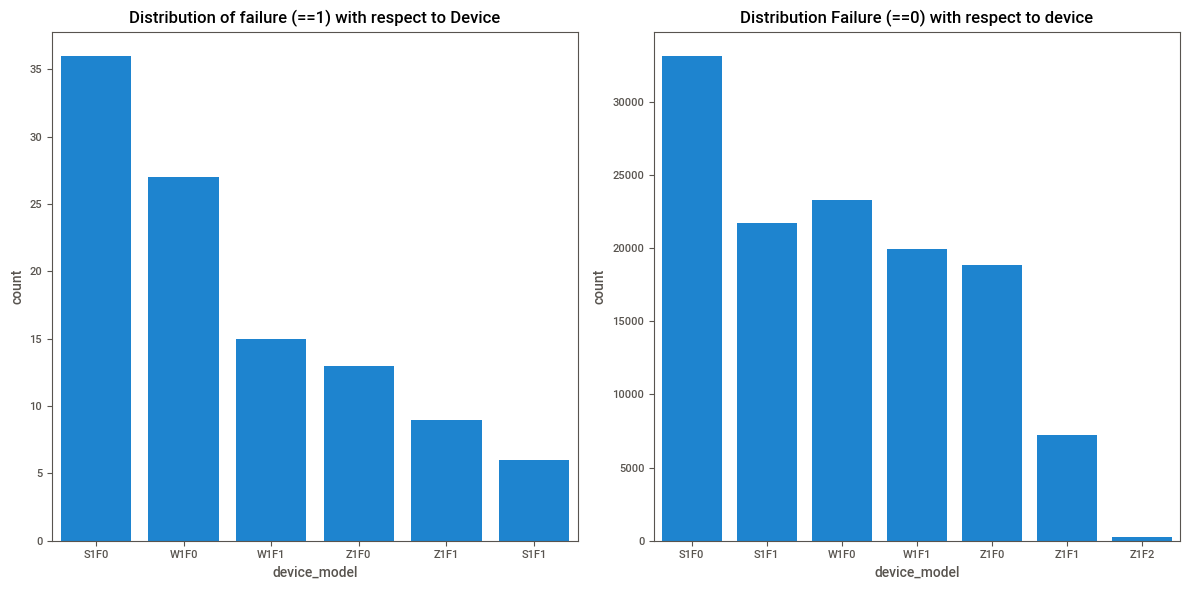

In [16]:
plt.figure(figsize=(12, 6))
## Plot the distribution of 'failure' with respect to 'device' for failure=1
# Tracez la distribution de « échec » par rapport au « périphérique » pour échec=1
plt.subplot(1, 2, 1) #positionner un sous-graphique
#Le countplot est utilisé pour représenter l'occurrence (le nombre) de l'observation présente dans la variable catégorielle . Il utilise le concept d'un graphique à barres pour la représentation visuelle.
sns.countplot(x="device_model", data=df.loc[df["failure"]==1])
plt.title('Distribution of failure (==1) with respect to Device')

#plot distribution of 'failure' with respect to device for failure==0 on second graph(1,2,2)
plt.subplot(1,2,2)
sns.countplot(x="device_model", data=df.loc[df["failure"]==0])
plt.title('Distribution Failure (==0) with respect to device')

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

In [17]:
#Puisqu'il n'y a pas de Z1F2 dans la cible, nous pourrions le supprimer pour de meilleurs résultats.
df.drop(df.loc[df["device_model"]=="Z1F2"].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.tail()

,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,device_model,device_rest
124237,11/2/2015,0,18310224,0.000000,0.000000,0.000000,10,353705,2.197225,0,Z1F0,MA1S
124238,11/2/2015,0,172556680,4.574711,4.682131,1.609438,11,332792,0.000000,13,Z1F0,Q8RT
124239,11/2/2015,0,19029120,8.483223,0.000000,0.000000,11,350410,0.000000,0,Z1F0,QK05
124240,11/2/2015,0,226953408,0.000000,0.000000,0.000000,12,358980,0.000000,0,Z1F0,QL3N
124241,11/2/2015,0,17572840,0.000000,0.000000,0.000000,10,351431,0.000000,70000,Z1F0,QLC1


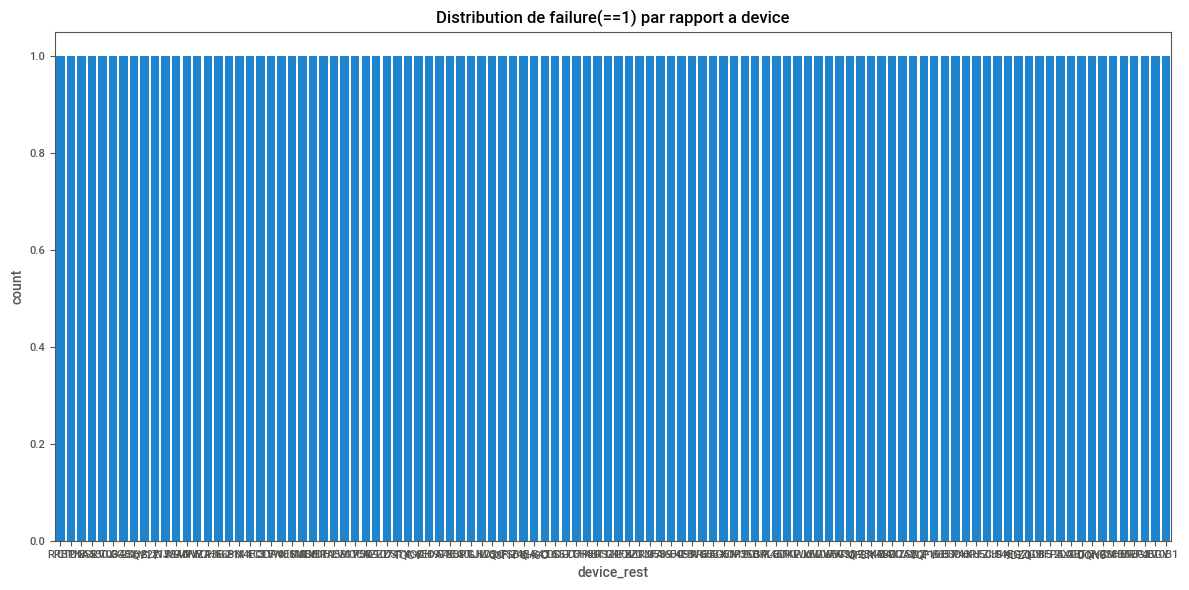

In [18]:
## Create a figure with 1 row and 2 columns
plt.figure(figsize=(12,6))
#afficher la distribution faillure=1 en focntion de device
sns.countplot(x="device_rest", data=df.loc[df["failure"]==1])
plt.title('Distribution de failure(==1) par rapport a device')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [19]:
#Étant donné que la répartition du reste de la colon
#L'axe 0 nous permet d'opérer sur les valeurs verticalement, c'est-à-dire en itérant sur chaque ligne. L'axe 1 nous permet d'opérer sur les valeurs horizontalement, c'est-à-dire en itérant sur chaque colonne ne de périphérique est de 1 dans la cible, cela ne nous sert à rien. je vais le laisser tomber
df.drop("device_rest", axis=1, inplace=True)
df.sample(5)
df.tail()

,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,device_model
124237,11/2/2015,0,18310224,0.000000,0.000000,0.000000,10,353705,2.197225,0,Z1F0
124238,11/2/2015,0,172556680,4.574711,4.682131,1.609438,11,332792,0.000000,13,Z1F0
124239,11/2/2015,0,19029120,8.483223,0.000000,0.000000,11,350410,0.000000,0,Z1F0
124240,11/2/2015,0,226953408,0.000000,0.000000,0.000000,12,358980,0.000000,0,Z1F0
124241,11/2/2015,0,17572840,0.000000,0.000000,0.000000,10,351431,0.000000,70000,Z1F0


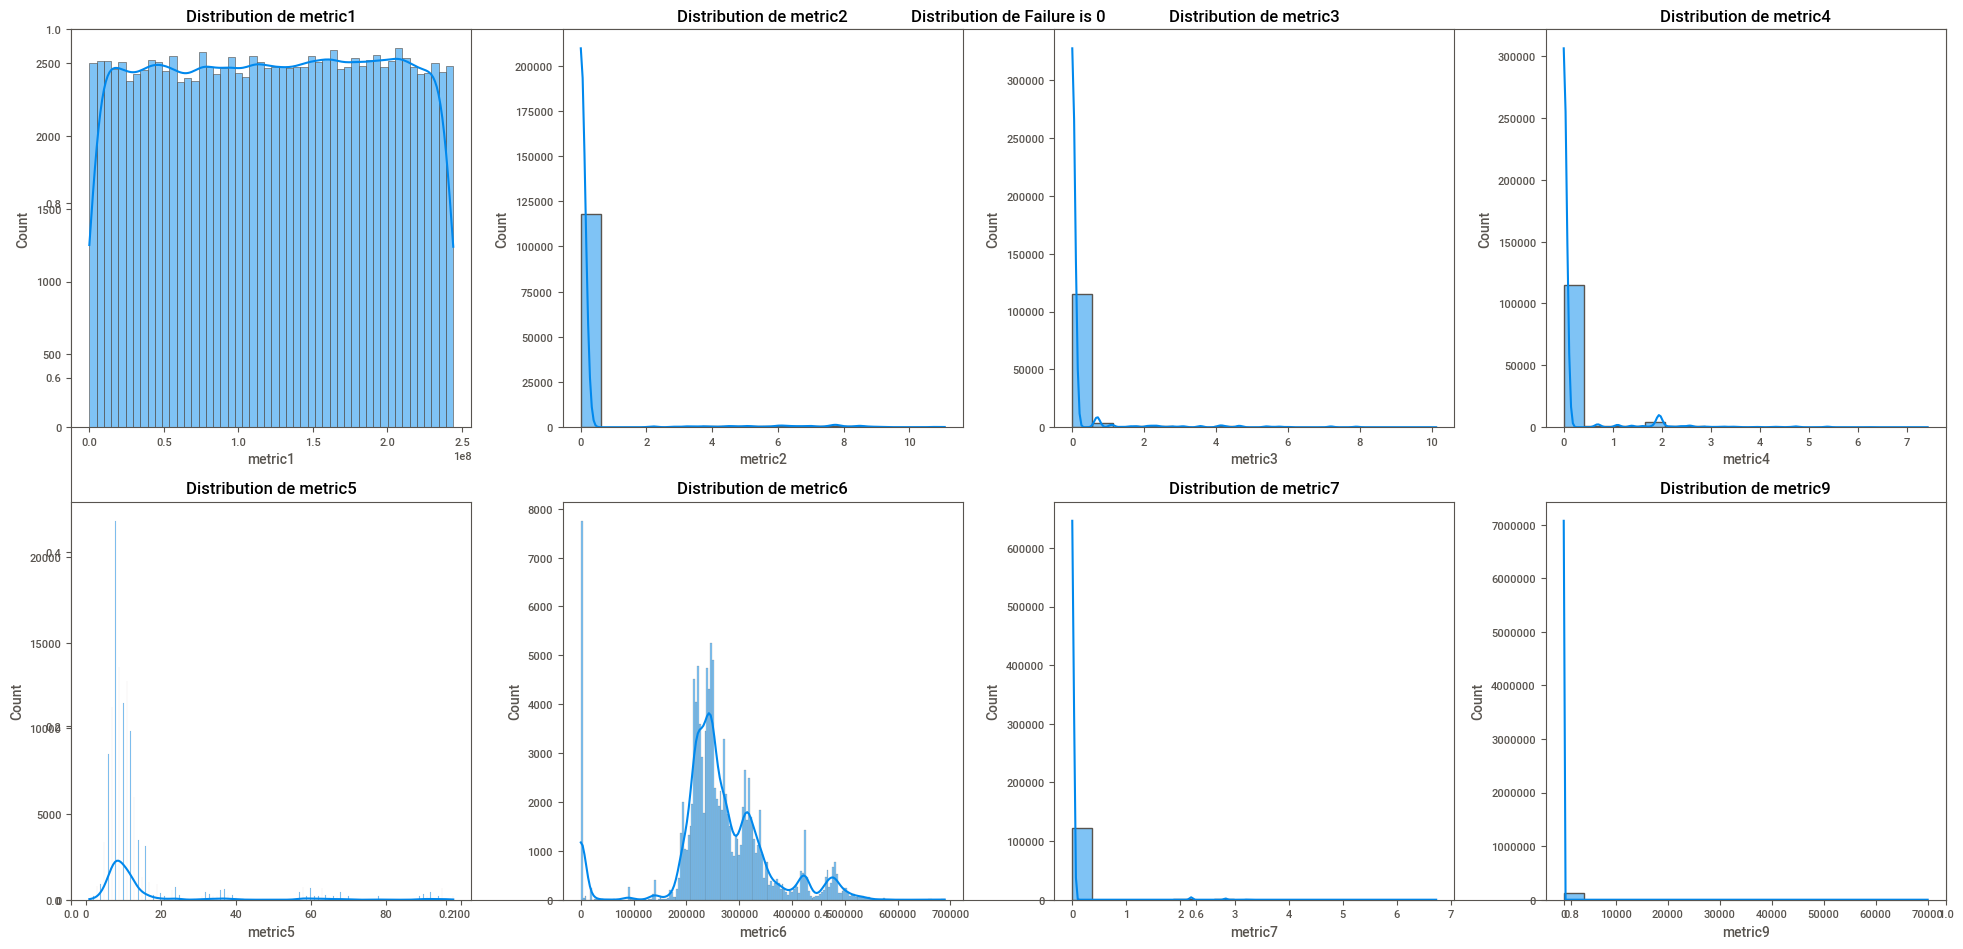

In [20]:
## Create histograms to visualize the distribution of selected metrics with 'failure' as hue
plt.figure(figsize=(4*5,2*5))
plt.title("Distribution de Failure is 0")

#When you use enumerate() in a for loop, you tell Python to use two variables, one for the count and one for the value itself
for i, col in enumerate(['metric1', 'metric2',  'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric9']):
    #print(i, col)
    plt.subplot(2,4,i+1)
    sns.histplot(x=col, data=df.loc[df["failure"]==0], kde=True) #affcicher histo de failure==0 par rapport a x
    plt.title(f'Distribution de {col}')

plt.tight_layout()

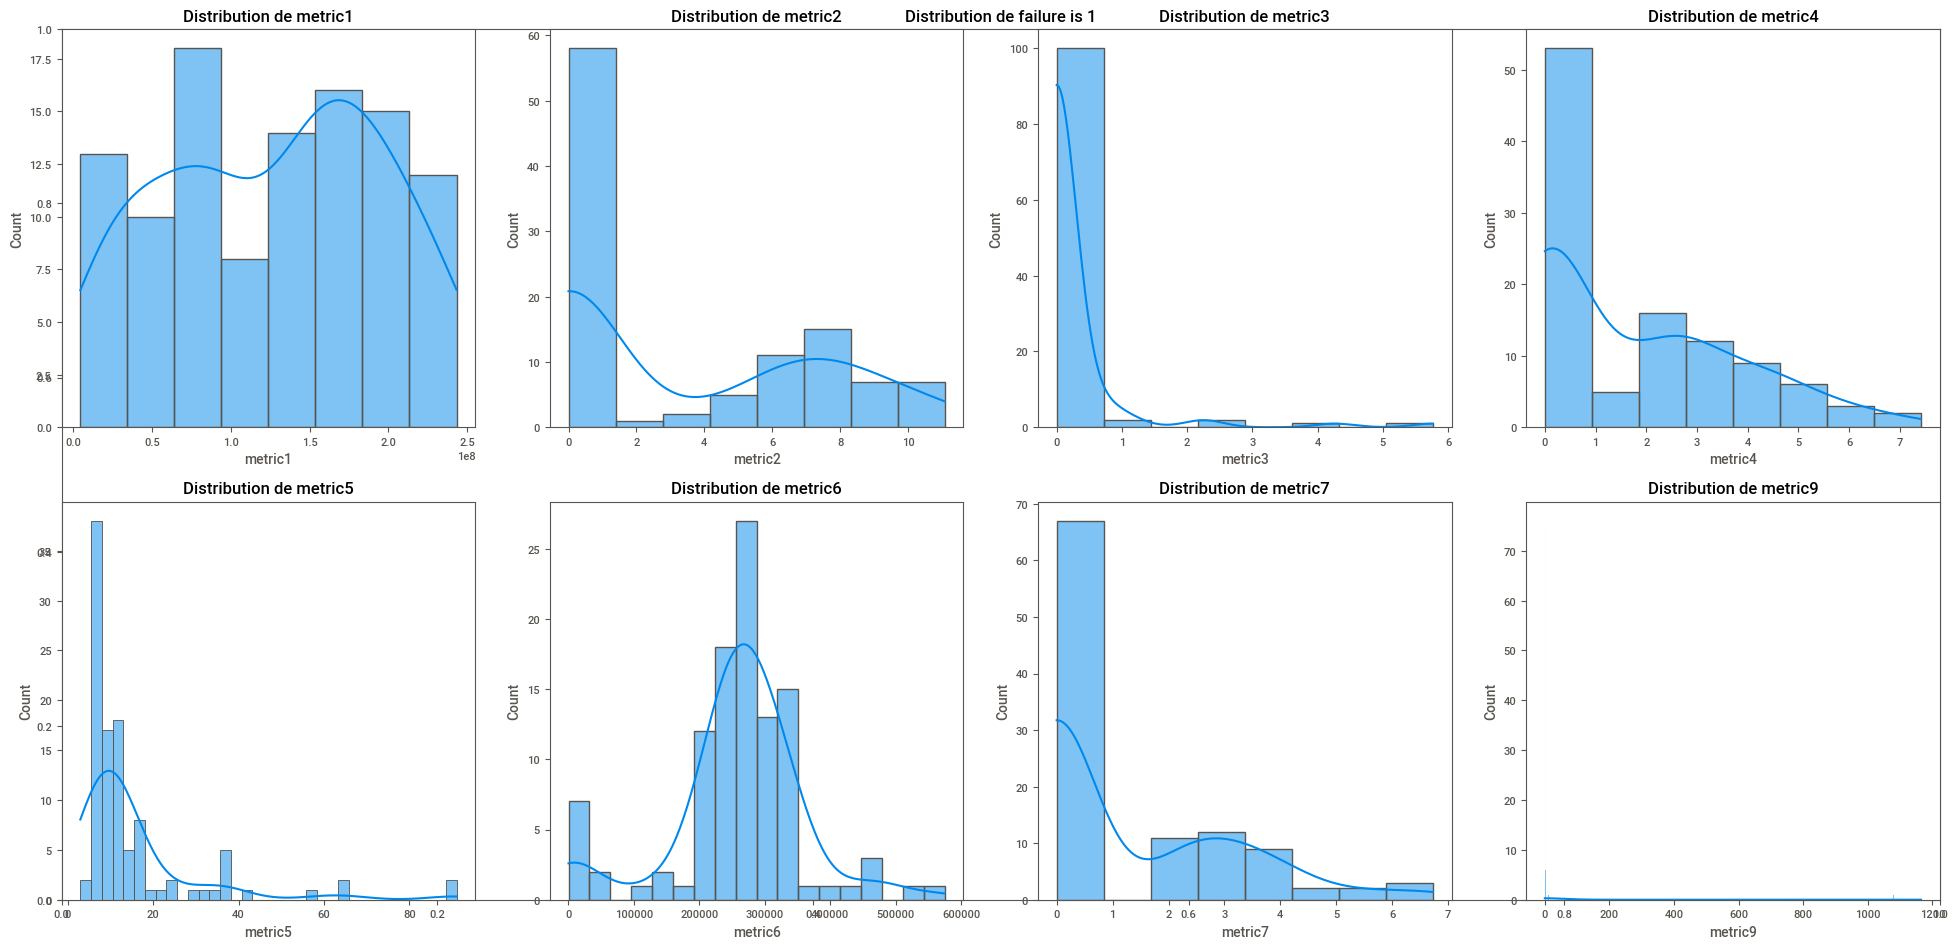

In [21]:
#we gonna do same thong
plt.figure(figsize=(20, 10))
plt.title("Distribution de failure is 1")

for i, col in enumerate(['metric1', 'metric2',  'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric9']):
    plt.subplot(2, 4, i+1)
    sns.histplot(x=col, data=df.loc[df["failure"]==1], kde=True)
    plt.title(f'Distribution de {col}')

plt.tight_layout()

Text(0.5, 1.0, 'Failure dans le temps par Mois')

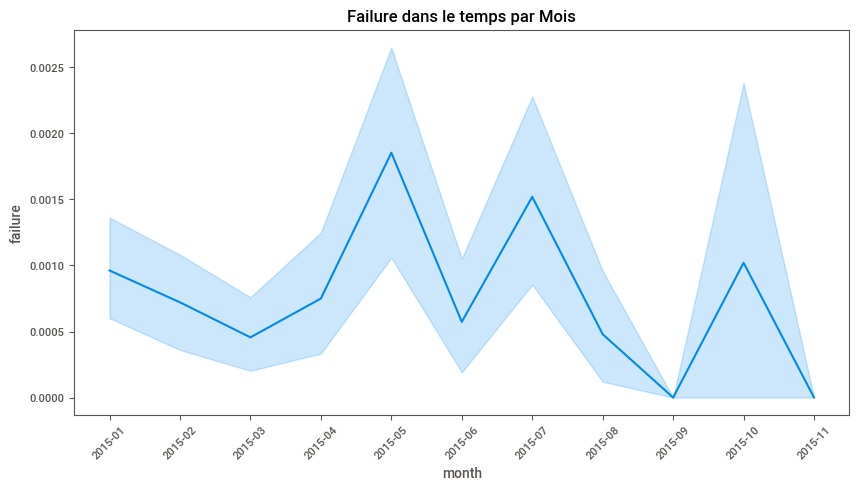

In [22]:
# Convert the 'date' column to datetime format
df['date']=pd.to_datetime(df['date'])

# Extract and format the 'month' column for plotting
df['month']=df['date'].dt.to_period('M')
df['month']=df['month'].dt.strftime('%Y-%m')

# Create a line plot to visualize 'failure' over time by month
plt.figure(figsize=(10, 5))
sns.lineplot(x='month', y='failure', data=df)
plt.xticks(rotation=45)
plt.title("Failure dans le temps par Mois")

Text(0.5, 1.0, 'Failure over Time by Week')

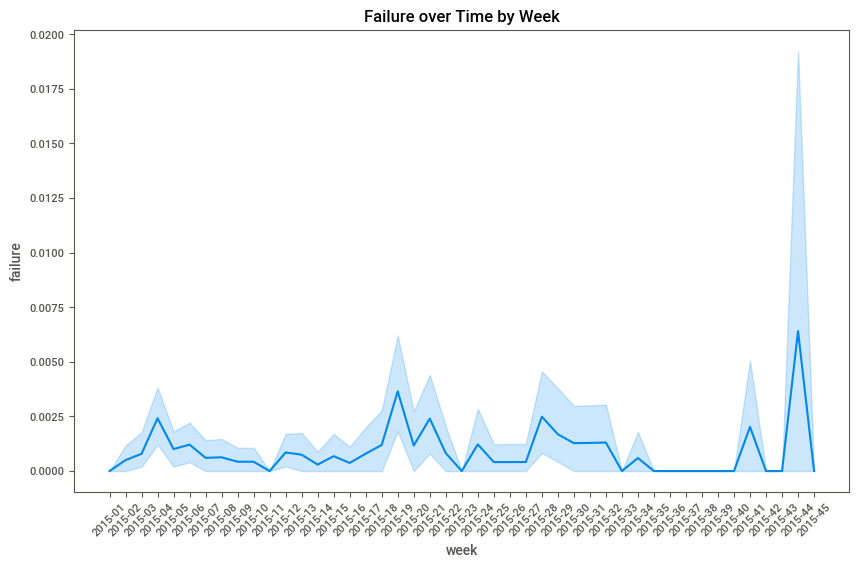

In [23]:
# Extract and format the 'week' column for plotting
df['week'] = df['date'].dt.to_period('W')
df['week'] = df['week'].dt.strftime('%Y-%U')

# Create a line plot to visualize 'failure' over time by week
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='week', y='failure')
plt.xticks(rotation=45)
plt.title("Failure over Time by Week")

Text(0.5, 1.0, 'Correlation Matrix')

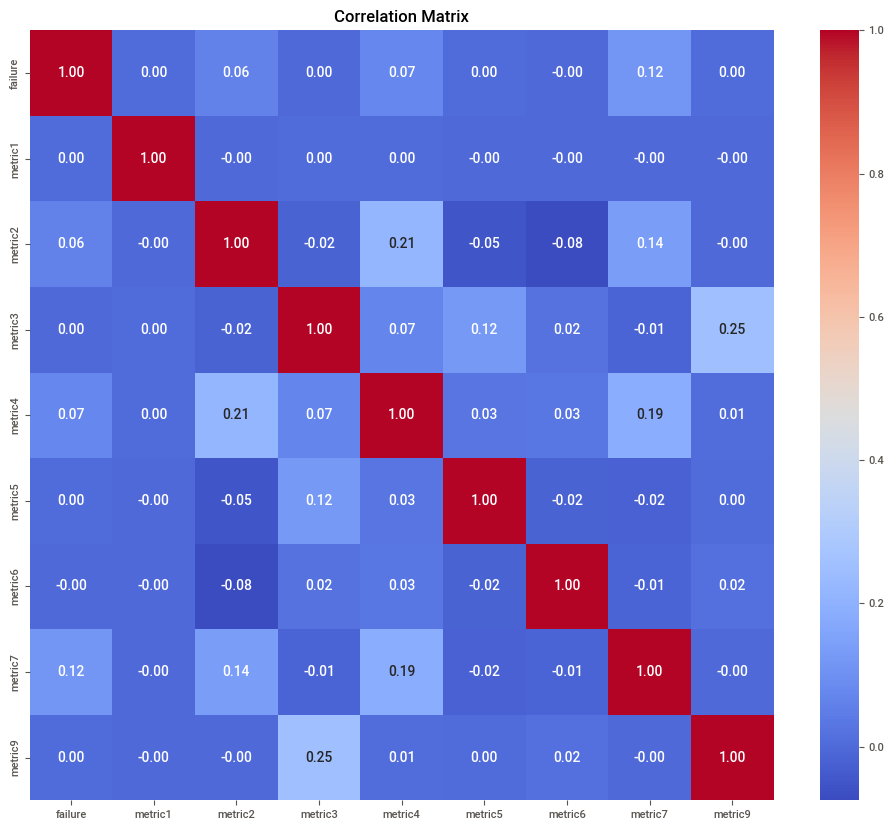

In [24]:
#on selectionne les colonnes numerique pour la correlation matrix
numerics_col=df.select_dtypes(include=[np.number])

#calculer la matrix de correlation
correlation_matrix=numerics_col.corr()

# Create a heatmap(carte de chaleur) to visualize the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

Étant donné que 'failure' est généralement nul, la recherche d’une corrélation ne serait pas efficace.

Text(0.5, 1.0, 'Distribution de failure')

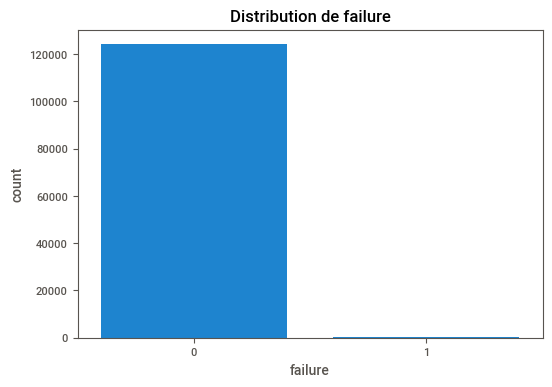

In [25]:
# Create a countplot to visualize the distribution of 'failure'

plt.figure(figsize=(6,4))
sns.countplot(x="failure", data=df)
plt.title("Distribution de failure")

Le problème est donc un problème de sous-échantillonnage !

In [26]:
# Extract day of week, day of month, and is_weekend features from the 'date' column

#cpnversion d'abord en format datetime de panda
df['date']=pd.to_datetime(df['date'])

df['day_of_week']= df['date'].dt.dayofweek
df['day_of_month']=df['date'].dt.day
df['is_weekend']=df['day_of_week'].apply(lambda x: 1 if x>=5 else 0)

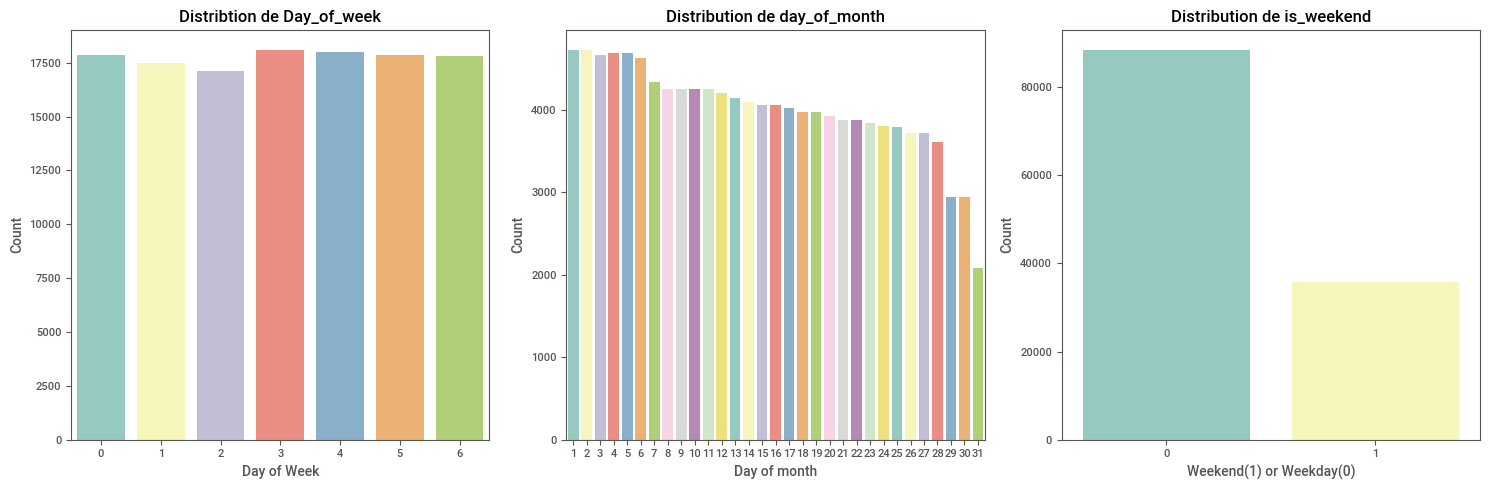

In [27]:
# Create subplots to visualize the distribution of day_of_week, day_of_month, and is_weekend

plt.figure(figsize=(15, 5))

# Distribution of 'day_of_week'
plt.subplot(131) #For example, "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot".
#tracer et compter le nombre de jour par rapport a tout son contenu data=df
sns.countplot(x='day_of_week', data=df, palette="Set3")
plt.title('Distribtion de Day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Count')

plt.subplot(132)
sns.countplot(x='day_of_month', data=df, palette='Set3')
plt.title('Distribution de day_of_month')
plt.xlabel("Day of month")
plt.ylabel("Count")

plt.subplot(133)
sns.countplot(x='is_weekend', data=df, palette='Set3')
plt.title('Distribution de is_weekend')
plt.xlabel('Weekend(1) or Weekday(0)')
plt.ylabel("Count")

#for good space
plt.tight_layout()
plt.show()

In [28]:
# Extract the month number and week number from the 'date' column and drop the 'date' column

df['month']= df['date'].dt.month #va creer la colonne month et week dans df
df['week']= df['date'].dt.isocalendar().week

df=df.drop('date', axis=1)

# Check the DataFrame information after these transformations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124242 entries, 0 to 124241
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   failure       124242 non-null  int64  
 1   metric1       124242 non-null  int64  
 2   metric2       124242 non-null  float64
 3   metric3       124242 non-null  float64
 4   metric4       124242 non-null  float64
 5   metric5       124242 non-null  int64  
 6   metric6       124242 non-null  int64  
 7   metric7       124242 non-null  float64
 8   metric9       124242 non-null  int64  
 9   device_model  124242 non-null  object 
 10  month         124242 non-null  int32  
 11  week          124242 non-null  UInt32 
 12  day_of_week   124242 non-null  int32  
 13  day_of_month  124242 non-null  int32  
 14  is_weekend    124242 non-null  int64  
dtypes: UInt32(1), float64(4), int32(3), int64(6), object(1)
memory usage: 12.4+ MB


In [29]:
df=pd.get_dummies(df,drop_first=True)

In [30]:
#pip install imblearn

In [31]:
# Import the necessary library for undersampling
from imblearn.under_sampling import RandomUnderSampler

In [32]:
# Create a copy of the DataFrame 'df', vu qu'il y a du desequilibre en failure on doit equilibrer cela
X=df.copy()

# Create the target variable 'Y' by selecting the 'failure' column
Y=df["failure"]

#on supprime la colonne failure de X
X.drop("failure", axis=1, inplace=True)

In [33]:
# Create an instance of the RandomUnderSampler with a fixed random state
rus= RandomUnderSampler(random_state=42)

# Perform random under-sampling and obtain resampled feature matrix and target variable
X_resampled, y_resampled=rus.fit_resample(X, Y)

In [34]:
# Create a new DataFrame 'under_sample' by copying the resampled features and adding the 'failure' column back
under_sample=X_resampled.copy()
under_sample["failure"]=y_resampled #j'ai cree la colonne failure dans Daaframe under_sample pour ajouter les element de y_resampled(Y=df["failure"])

In [35]:
# Display a random sample of 10 rows from the under-sampled dataset
under_sample.sample(10)

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,month,week,day_of_week,day_of_month,is_weekend,device_model_S1F1,device_model_W1F0,device_model_W1F1,device_model_Z1F0,device_model_Z1F1,failure
79350,141805096,0.00000,0.000000,0.693147,7,267203,0.000000,0,5,19,5,9,1,False,True,False,False,False,1
76217,183295960,0.00000,0.000000,0.000000,11,216230,0.000000,0,5,18,4,1,0,False,False,False,False,False,0
87027,176325712,0.00000,0.000000,0.000000,6,28,0.000000,0,5,22,5,30,1,False,False,True,False,False,0
62994,40512728,0.00000,0.000000,0.000000,14,284406,0.000000,0,3,13,6,29,1,False,False,True,False,False,0
44076,170937032,0.00000,0.000000,0.000000,38,290698,0.000000,3,2,9,5,28,1,False,True,False,False,False,0
15731,64499464,0.00000,0.000000,0.693147,19,514661,2.833213,3,1,4,0,19,0,False,False,False,False,False,1
97924,178051496,0.00000,0.000000,0.000000,7,265316,0.000000,0,6,27,1,30,0,False,False,False,False,True,1
105539,51722496,0.00000,0.000000,0.000000,10,246237,0.000000,6,7,30,3,23,0,True,False,False,False,False,0
55176,32740584,0.00000,0.000000,4.394449,13,467262,3.218876,0,3,12,1,17,0,False,False,False,False,False,1
60391,38345816,6.82546,0.693147,0.693147,8,233709,0.000000,0,3,13,1,24,0,False,False,False,True,False,1


Text(0.5, 1.0, 'Distribution de failure apres RandonUnderSampler')

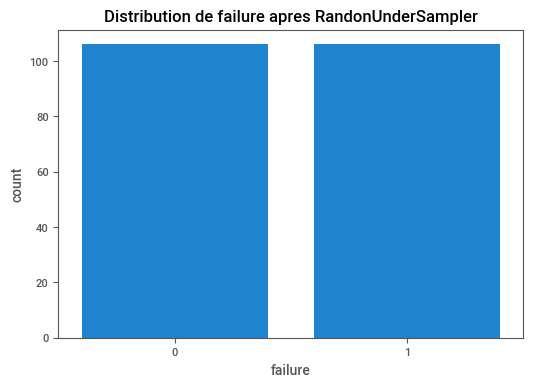

In [36]:
# Create a countplot to visualize the distribution of 'failure' in the under-sampled dataset
plt.figure(figsize=(6,4))
sns.countplot(x="failure", data=under_sample)
plt.title("Distribution de failure apres RandonUnderSampler")

Et la maintenant on voit que c'est équilibré 

In [37]:
# Import the necessary libraries for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create feature matrix 'X_norm' and target variable 'y_norm'
X_norm= under_sample.drop(['failure'], axis=1)
y_norm= under_sample['failure']

# Split the data into training and testing sets
x_train,x_test, y_train,y_test= train_test_split(X_norm, y_norm, test_size=0.2, random_state=42) 

# Standardize the features
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [38]:
# Import various classification algorithms and evaluation metrics
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
#pour les metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate multiple classifiers and return a DataFrame with metrics
def evaluate_model(x_train, y_train, x_test, y_test):
    # Define a list of classifiers
    classifiers=[
        GradientBoostingClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        ExtraTreesClassifier(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        GaussianNB(),
        BernoulliNB(),
        SVC(),
        LogisticRegression(),
        SGDClassifier(),
    ]
        
    # Define the names of classifiers
    classifier_names=[
        'GradientBoost',
        'RandomForest',
        'AdaBoost',
        'ExtraTrees',
        'DecisionTree',
        'KNeighbors',
        'GaussianNB',
        'BernoulliNB',
        'SVC',
        'LogisticRegression',
        'SGD',
    ]
        
    # Create an empty DataFrame for metrics
    metrics= pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=classifier_names)
    
    for i, clf in enumerate(classifiers):
        clf.fit(x_train, y_train)
        y_pred=clf.predict(x_test)

        #Determiner les metri entre les test et predictions
        accuracy= accuracy_score(y_test, y_pred)
        precision= precision_score(y_test, y_pred)
        recall= recall_score(y_test, y_pred)
        f1= f1_score(y_test, y_pred)
        
        #attriber les result au colonnes correspondantes
        metrics.loc[classifier_names[i], 'Accuracy']= accuracy
        metrics.loc[classifier_names[i], 'Precision']= precision
        metrics.loc[classifier_names[i], 'Recall']= recall
        metrics.loc[classifier_names[i], 'F1']= f1
            
    # Sort the metrics by accuracy in descending order
    metrics = metrics.sort_values(by='Accuracy', ascending=False)

    return metrics

# Step 4: Evaluate models
metrics=evaluate_model(x_train, y_train, x_test, y_test)

In [39]:
metrics

,Accuracy,Precision,Recall,F1
AdaBoost,0.906977,0.916667,0.916667,0.916667
GradientBoost,0.860465,0.909091,0.833333,0.869565
RandomForest,0.860465,0.909091,0.833333,0.869565
GaussianNB,0.860465,0.95,0.791667,0.863636
SVC,0.860465,1.0,0.75,0.857143
ExtraTrees,0.837209,0.869565,0.833333,0.851064
BernoulliNB,0.813953,0.9,0.75,0.818182
LogisticRegression,0.813953,0.9,0.75,0.818182
KNeighbors,0.790698,0.941176,0.666667,0.780488
DecisionTree,0.744186,0.76,0.791667,0.77551


AdaBoost is the best Model

In [49]:
from sklearn.ensemble import AdaBoostClassifier

# Créer et entraîner le modèle AdaBoost
ada_model = AdaBoostClassifier()
ada_model.fit(x_train, y_train)

y_pred = ada_model.predict(X_norm)

# Créer un DataFrame pour les prédictions avec l'index d'origine
predictions_df = pd.DataFrame({'Predicted_Failure': y_pred}, index=under_sample.index)

In [50]:
# Ajouter les prédictions au DataFrame d'origine
df['Predicted_Failure'] = 0  # Initialiser la colonne
df.loc[predictions_df.index, 'Predicted_Failure'] = predictions_df['Predicted_Failure']# Remplir avec les prédictions


In [52]:
# Prédire les probabilités de panne
y_pred_proba = ada_model.predict_proba(x_test)[:, 1]  # Prendre la probabilité de la classe positive

# Créer un DataFrame avec les résultats
predictions_df = pd.DataFrame({'equipment_id': x_test.index, 'failure_probability': y_pred_proba})

# Vérifie le DataFrame
print(predictions_df.head())


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [40]:
#on install pyomo
#Pyomo nécessite également un solveur d'optimisation comme GLPK ou CBC. Si tu n'en as pas, tu peux utiliser l'un d'eux, par exemple :
#bash
#sudo apt-get install glpk-utils

#!pip install pyomo

In [41]:
#pip install glpk

In [43]:
#Intégration de Pyomo
from pyomo.environ import ConcreteModel, Var, Objective, Constraint, SolverFactory, Binary

# Créer un modèle Pyomo
model=ConcreteModel()
# Nombre d'équipements à optimiser (basé sur mes données)
n=len(df)

# Variable binaire pour décider si la maintenance est faite ou non à chaque étape
model.maintenance=Var(range(n), domain=Binary)

#crée une variable de décision dans le modèle Pyomo :   
#model.maintenance : c'est le nom de la variable.
#Var(range(n), domain=Binary) : cela signifie que la variable est définie pour chaque élément dans la plage de 0 à n-1 (le nombre d'équipements ou de périodes), et qu'elle peut prendre uniquement les valeurs 0 ou 1 (binaire).
#The range() function returns a sequence of numbers, starting from 0 by default, and increments by 1 (by default), and stops before a specified number

#Parametre des couts
downtime_cost= 100 #cout de chaque panne, down diminuer le temps de 100
uptime_benefit= 50 #Gain pour chaque période de fonctionnement sans panne, augmentez le temps de fonctionnement sans panne de 50

# Fonction objectif: minimiser le coût total
#Le coût total est une combinaison des coûts des pannes (prédites par AdaBoost) et des coûts de maintenance planifiée.
def objective_rule(model):
    return sum((1- model.maintenance[i])*downtime_cost for i in range(n)) - sum(model.maintenance[i]*uptime_benefit for i in range(n))

model.objective= Objective(rule=objective_rule, sense=1)

# Contrainte (exemple): Ne pas effectuer la maintenance plus d'une fois toutes les 10 périodes
def maintenance_constraint_rule(model, i):
    if i>=10:
        return sum(model.maintenance[j] for j in range(i-10, i))<=1 #incremente jusqu'a i

    return Constraint.Skip

model.maintenance_constraint= Constraint(range(n), rule=maintenance_constraint_rule)

# Résoudre le problème
solver=SolverFactory('glpk')
solver.solve(model)

#Result
maintenance_schedule=[model.maintenance[i].value for i in range(n)]
print("Programme de Maintenance Optimale\n", maintenance_schedule)

Programme de Maintenance Optimale
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,